<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(_3_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,91.423130,45.826171,-0.000291,147.249010,147.249684,-0.000674
1,0.0,1.0,99.226669,88.627547,-0.000023,197.854193,197.854451,-0.000259
2,0.0,2.0,92.518963,72.343184,-0.000041,174.862106,174.862404,-0.000298
3,0.0,3.0,85.251467,94.057231,0.000248,189.308946,189.308775,0.000171
4,0.0,4.0,67.327355,68.365215,-0.000468,145.692102,145.692612,-0.000510
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,36.489901,33.150816,0.000972,79.641689,79.640869,0.000820
19996,999.0,16.0,22.687479,69.496522,-0.000524,102.183476,102.183522,-0.000045
19997,999.0,17.0,50.844948,74.651562,-0.000526,135.495984,135.495995,-0.000010
19998,999.0,18.0,89.940929,79.947827,-0.000601,179.888154,179.888220,-0.000066


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    91.423130  45.826171 -0.000291  147.249010  147.249684 -0.000674
      1.0    99.226669  88.627547 -0.000023  197.854193  197.854451 -0.000259
      2.0    92.518963  72.343184 -0.000041  174.862106  174.862404 -0.000298
      3.0    85.251467  94.057231  0.000248  189.308946  189.308775  0.000171
      4.0    67.327355  68.365215 -0.000468  145.692102  145.692612 -0.000510
...                ...        ...       ...         ...         ...       ...
999.0 15.0   36.489901  33.150816  0.000972   79.641689   79.640869  0.000820
      16.0   22.687479  69.496522 -0.000524  102.183476  102.183522 -0.000045
      17.0   50.844948  74.651562 -0.000526  135.495984  135.495995 -0.000010
      18.0   89.940929  79.947827 -0.000601  179.888154  179.888220 -0.000066
      19.0   41.799406  91.555870 -0.000703  143.354573  143.354463  0.000110

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    91.423130  45.826171 -0.000291  147.249010  147.249684 -0.000674
      1.0    99.226669  88.627547 -0.000023  197.854193  197.854451 -0.000259
      2.0    92.518963  72.343184 -0.000041  174.862106  174.862404 -0.000298
      3.0    85.251467  94.057231  0.000248  189.308946  189.308775  0.000171
      4.0    67.327355  68.365215 -0.000468  145.692102  145.692612 -0.000510
...                ...        ...       ...         ...         ...       ...
999.0 15.0   36.489901  33.150816  0.000972   79.641689   79.640869  0.000820
      16.0   22.687479  69.496522 -0.000524  102.183476  102.183522 -0.000045
      17.0   50.844948  74.651562 -0.000526  135.495984  135.495995 -0.000010
      18.0   89.940929  79.947827 -0.000601  179.888154  179.888220 -0.000066
      19.0   41.799406  91.555870 -0.000703  143.354573  143.354463  0.000110

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,91.423130,45.826171,-0.000291,147.249010,147.249684,-0.000674
1,0.0,1.0,99.226669,88.627547,-0.000023,197.854193,197.854451,-0.000259
2,0.0,2.0,92.518963,72.343184,-0.000041,174.862106,174.862404,-0.000298
3,0.0,3.0,85.251467,94.057231,0.000248,189.308946,189.308775,0.000171
4,0.0,4.0,67.327355,68.365215,-0.000468,145.692102,145.692612,-0.000510
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,36.489901,33.150816,0.000972,79.641689,79.640869,0.000820
19996,999.0,16.0,22.687479,69.496522,-0.000524,102.183476,102.183522,-0.000045
19997,999.0,17.0,50.844948,74.651562,-0.000526,135.495984,135.495995,-0.000010
19998,999.0,18.0,89.940929,79.947827,-0.000601,179.888154,179.888220,-0.000066


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    91.423130  45.826171 -0.000291  147.249010  147.249684 -0.000674
      1.0    99.226669  88.627547 -0.000023  197.854193  197.854451 -0.000259
      2.0    92.518963  72.343184 -0.000041  174.862106  174.862404 -0.000298
      3.0    85.251467  94.057231  0.000248  189.308946  189.308775  0.000171
      4.0    67.327355  68.365215 -0.000468  145.692102  145.692612 -0.000510
...                ...        ...       ...         ...         ...       ...
999.0 15.0   36.489901  33.150816  0.000972   79.641689   79.640869  0.000820
      16.0   22.687479  69.496522 -0.000524  102.183476  102.183522 -0.000045
      17.0   50.844948  74.651562 -0.000526  135.495984  135.495995 -0.000010
      18.0   89.940929  79.947827 -0.000601  179.888154  179.888220 -0.000066
      19.0   41.799406  91.555870 -0.000703  143.354573  143.354463  0.000110

[20000 rows x 6 columns]

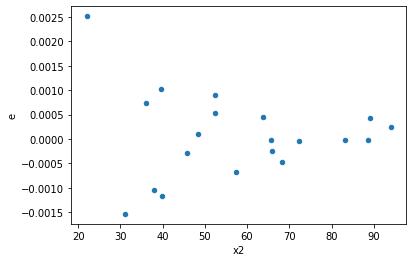

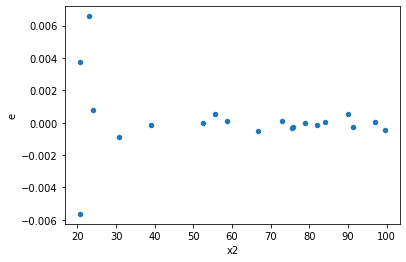

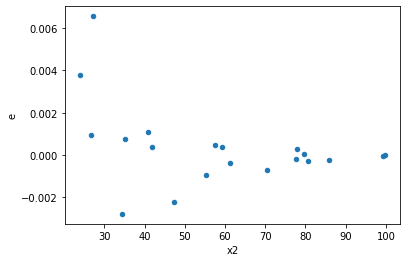

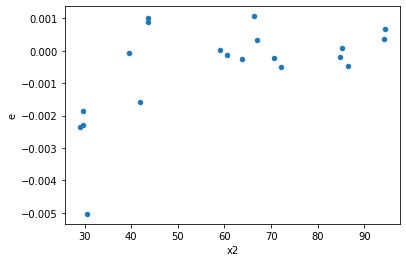

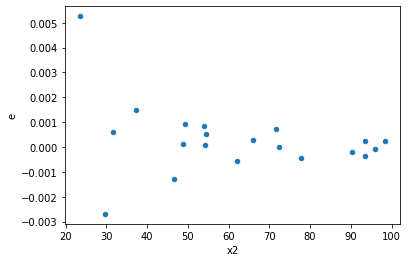

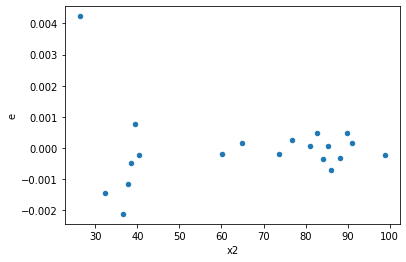

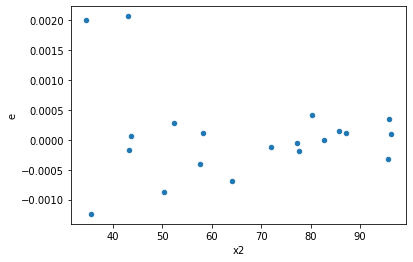

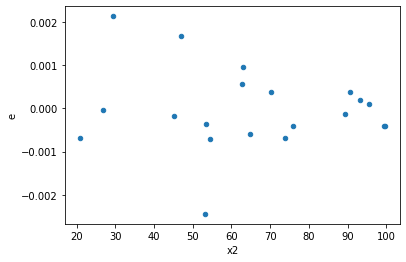

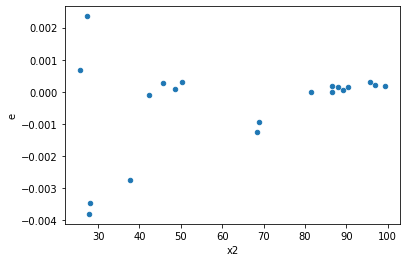

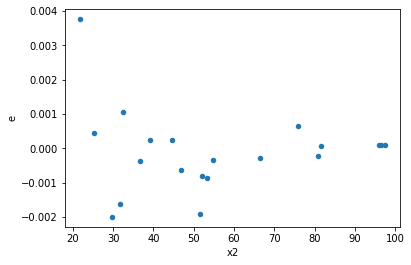

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,5.0,11.0,6.418726567876977e-06,6.628116171765923e-05,1.2837453135753954e-06,6.025560156150839e-06,4.693734880611856,0.030755157575622416,0.9846224212121888,0.015377578787811208,Reject001=1 : Homoscedasticity
2.0,8.0,8.0,1.2913248733004114e-06,4.991395209242815e-05,1.6141560916255142e-07,6.239244011553519e-06,38.653287894049775,2.6634834044747535e-05,0.9999866825829776,1.3317417022373768e-05,Reject001=0 : Heteroscedasticity
4.0,7.0,9.0,9.873146947919159e-07,3.3967705839178645e-05,1.4104495639884513e-07,3.7741895376865162e-06,26.758769927326654,4.981923306357494e-05,0.9999750903834682,2.490961653178747e-05,Reject001=0 : Heteroscedasticity
5.0,10.0,6.0,1.2060497775711164e-06,2.494017165355061e-05,1.2060497775711165e-07,4.156695275591769e-06,34.46537077402399,0.0003330489805664083,0.9998334755097168,0.00016652449028320415,Reject001=0 : Heteroscedasticity
7.0,8.0,8.0,1.6747153898760932e-06,1.1383876283665902e-05,2.0933942373451165e-07,1.4229845354582377e-06,6.797499057143171,0.013707366804276644,0.9931463165978617,0.006853683402138322,Reject001=1 : Homoscedasticity
10.0,11.0,5.0,6.217019453321346e-06,2.057927758100248e-05,5.651835866655769e-07,4.115855516200496e-06,7.282333764295736,0.04002772148575873,0.9799861392571206,0.020013860742879364,Reject001=1 : Homoscedasticity
11.0,10.0,6.0,3.299849567350637e-06,5.689603446340931e-06,3.299849567350637e-07,9.482672410568219e-07,2.8736680921432454,0.2089718388439954,0.8955140805780023,0.1044859194219977,Reject001=1 : Homoscedasticity
12.0,11.0,5.0,1.1312048846028605e-06,9.641937792710994e-06,1.0283680769116913e-07,1.928387558542199e-06,18.751919685540713,0.0046251213732264596,0.9976874393133868,0.0023125606866132298,Reject001=0 : Heteroscedasticity
14.0,6.0,10.0,1.131794708490991e-06,1.9865649165555655e-05,1.886324514151652e-07,1.9865649165555655e-06,10.531405925395585,0.001571249508056649,0.9992143752459717,0.0007856247540283245,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,6.0,7.039464678391552e-06,2.3554816401047268e-06,7.039464678391552e-07,3.925802733507878e-07,0.5576848400928244,0.39537333450115364,Reject001=1 : Homoscedasticity
1.0,5.0,11.0,6.418726567876977e-06,6.628116171765923e-05,1.2837453135753954e-06,6.025560156150839e-06,4.693734880611856,0.030755157575622416,Reject001=1 : Homoscedasticity
2.0,8.0,8.0,1.2913248733004114e-06,4.991395209242815e-05,1.6141560916255142e-07,6.239244011553519e-06,38.653287894049775,2.6634834044747535e-05,Reject001=0 : Heteroscedasticity
3.0,9.0,7.0,2.0834368729412306e-05,1.8947240947935282e-06,2.3149298588235898e-06,2.7067487068478973e-07,0.11692573304244404,0.004609849726653065,Reject001=0 : Heteroscedasticity
4.0,7.0,9.0,9.873146947919159e-07,3.3967705839178645e-05,1.4104495639884513e-07,3.7741895376865162e-06,26.758769927326654,4.981923306357494e-05,Reject001=0 : Heteroscedasticity
5.0,10.0,6.0,1.2060497775711164e-06,2.494017165355061e-05,1.2060497775711165e-07,4.156695275591769e-06,34.46537077402399,0.0003330489805664083,Reject001=0 : Heteroscedasticity
6.0,8.0,8.0,1.0435589483993278e-05,4.1020917877795937e-07,1.3044486854991598e-06,5.127614734724492e-08,0.03930867340145589,0.0001306458333125022,Reject001=0 : Heteroscedasticity
7.0,8.0,8.0,1.6747153898760932e-06,1.1383876283665902e-05,2.0933942373451165e-07,1.4229845354582377e-06,6.797499057143171,0.013707366804276644,Reject001=1 : Homoscedasticity
8.0,9.0,7.0,1.9847843373034144e-05,8.400733247807538e-06,2.205315930337127e-06,1.2001047496867912e-06,0.5441872219656668,0.3888207301136753,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    530
Reject001=1 : Homoscedasticity      470
Name: Result_test, dtype: int64